In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
dic = {}
cnt = 0
with open('../../../../sample_data/data/camel_on_spiral/snippet_camel_0.txt') as f:
    while True:
        line = f.readline()
        if line == '':
            break
        tmp = line.split('\t')
        if tmp[1].strip() != '':
            dic[tmp[0]] = len(tmp[1:])

id_list = []
id2_list = []
for key in dic.keys():
    tmp = key.split('-')
    id_list.append(int(tmp[0]))
    id2_list.append(int(tmp[1]))
    
length_df = pd.DataFrame(
    data= {'id':id_list,
           'id2':id2_list,
           'snippet_length':dic.values()
           }
)

In [59]:
hexsha_df = pd.read_csv('../../../../sample_data/data/camel_on_spiral/hexsha_filename_camel.txt',
                        header=None,
                        names=["id","commit_hash", "before_filename", "after_filename","change_type"]
                        )

In [66]:
df = pd.merge(length_df, hexsha_df, on='id', how='left')

In [67]:
df2 = df[['id','change_type','snippet_length']].groupby(['id','change_type'], as_index=False).sum()

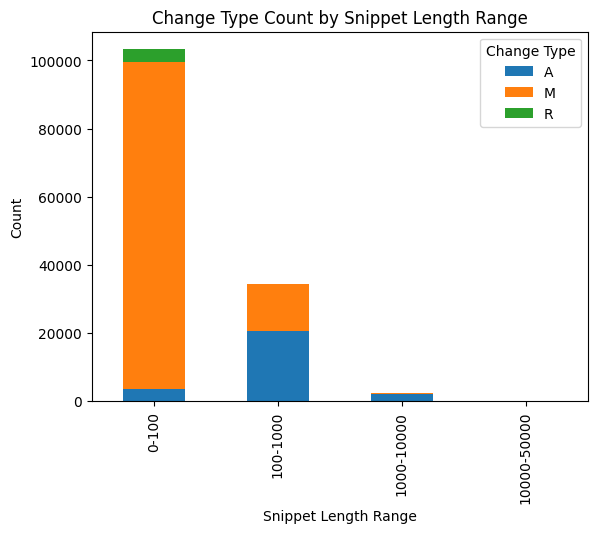

In [68]:
bins = [0, 100, 1000, 10000, 50000]
labels = ['0-100', '100-1000', '1000-10000', '10000-50000']  # 各範囲のラベル

df2['snippet_length_range'] = pd.cut(df2['snippet_length'], bins=bins, labels=labels)

# 範囲ごとのchange_typeの数を計算
change_type_counts = df2.groupby(['snippet_length_range', 'change_type']).size().unstack()

change_type_counts.plot(kind='bar', stacked=True)

plt.xlabel('Snippet Length Range')
plt.ylabel('Count')
plt.title('Change Type Count by Snippet Length Range')
plt.legend(title='Change Type')

plt.show()

In [69]:
target_ratio = 0.9

sorted_df = df2.sort_values('snippet_length')

cumulative_sum = sorted_df['snippet_length'].cumsum()
cumulative_ratio = cumulative_sum / cumulative_sum.max()

threshold_value = sorted_df.loc[cumulative_ratio >= target_ratio, 'snippet_length'].iloc[0]

print(threshold_value)

2744


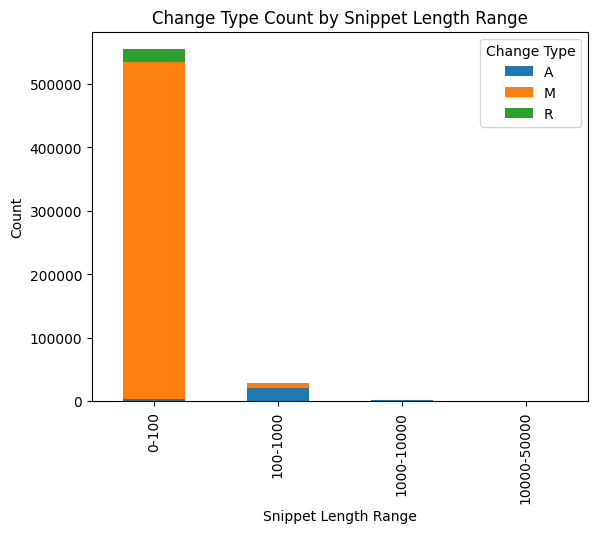

In [71]:
bins = [0, 100, 1000, 10000, 50000]
labels = ['0-100', '100-1000', '1000-10000', '10000-50000']  # 各範囲のラベル
df['snippet_length_range'] = pd.cut(df['snippet_length'], bins=bins, labels=labels)

# 範囲ごとのchange_typeの数を計算
change_type_counts = df.groupby(['snippet_length_range', 'change_type']).size().unstack()

change_type_counts.plot(kind='bar', stacked=True)

plt.xlabel('Snippet Length Range')
plt.ylabel('Count')
plt.title('Change Type Count by Snippet Length Range')
plt.legend(title='Change Type')

plt.show()

In [72]:
target_ratio = 0.9

sorted_df = df.sort_values('snippet_length')

cumulative_sum = sorted_df['snippet_length'].cumsum()
cumulative_ratio = cumulative_sum / cumulative_sum.max()

threshold_value = sorted_df.loc[cumulative_ratio >= target_ratio, 'snippet_length'].iloc[0]

print(threshold_value)


2609


In [25]:
sorted_df

,id,id2,snippet_length,commit_hash,before_filename,after_filename,change_type,snippet_length_range
250262,67069,2,1,7e65a14d0fb2e49282bbf51ebe463c6fff38073d,components/camel-aws/src/test/java/org/apache/...,components/camel-aws/src/test/java/org/apache/...,M,0-100
240268,64667,3,1,e696c601329d695a82673227b28ab134644bf52c,components/camel-jpa/src/test/java/org/apache/...,components/camel-jpa/src/test/java/org/apache/...,M,0-100
240266,64667,1,1,e696c601329d695a82673227b28ab134644bf52c,components/camel-jpa/src/test/java/org/apache/...,components/camel-jpa/src/test/java/org/apache/...,M,0-100
240261,64666,9,1,e696c601329d695a82673227b28ab134644bf52c,components/camel-jpa/src/test/java/org/apache/...,components/camel-jpa/src/test/java/org/apache/...,M,0-100
445351,114958,10,1,1ca43e4131f6bad5b39e9fa5b0bb0db4d357e2c2,components/camel-reactive-streams/src/main/jav...,components/camel-reactive-streams/src/main/jav...,M,0-100
...,...,...,...,...,...,...,...,...
518098,125862,1,23081,40685296333d69402111067c1a1a9b3f99a6661f,components/camel-hl7/src/main/java/org/apache/...,components/camel-hl7/src/main/java/org/apache/...,A,1000-50000
592150,155193,1,28877,d1099089c4af691f649080693786101d9b4c13dd,camel-core/src/main/java/org/apache/camel/impl...,camel-core/src/main/java/org/apache/camel/impl...,A,1000-50000
412710,106993,7,31793,e1cfeb5a55200350771c88c93e65720990131610,components/camel-salesforce/camel-salesforce-c...,components/camel-salesforce/camel-salesforce-c...,M,1000-50000
422919,109979,1,32689,c8d2aad1685568ac8cdc59e9e956914435fa9535,connectors/examples/salesforce-upsert-contact-...,connectors/examples/salesforce-upsert-contact-...,A,1000-50000
